In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cmcrameri import cm
import babet as bb
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
import metpy.calc as mpcalc 
from metpy.units import units

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-11', '2023-10-13', '2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [6]:
# Plot settings

# UK
lat_max = 60
lat_min = 42
lon_min = -12
lon_max = 5

# #Europe
# lat_max = 70
# lat_min = 33
# lon_min = -27
# lon_max = 25

euroatlantic = [lon_min-13, lon_max, lat_min-5, lat_max+6]
uk = [-11, 10, 48, 70]
northsea = [-17, 20, 40, 70]

# Import data

In [3]:
# Import forecast data 
base_dir = '/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/MED-R/EXP/{}/EU025/pl/pf'
exp = {}
for experiment in experiments:
    exp[experiment] = xr.open_mfdataset(os.path.join(base_dir.format(experiment), '*.nc'), preprocess=bb.Data.preproc_ds)

In [4]:
# Import forecast data at surface
base_dir = '/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/MED-R/EXP/{}/EU025/sfc/pf'
exp_sfc = {}
for experiment in experiments:
    exp_sfc[experiment] = xr.open_mfdataset(os.path.join(base_dir.format(experiment), '*.nc'), preprocess=bb.Data.preproc_ds)

In [5]:
# Import ERA5 data
era5_dir = '/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/ERA5/EU025/pl/'
era5 = xr.open_mfdataset(os.path.join(era5_dir, '*.nc'))
era5 = era5.sel(time=slice('2023-10-17 00', '2023-10-23 00'))

In [17]:
fpw = {key: (exp_sfc[key].tp/exp_sfc[key].tcw)*100 for key in exp_sfc.keys()}

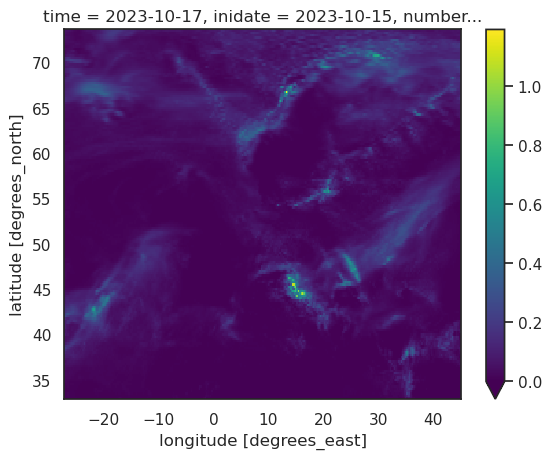

In [19]:
fpw['curr'].sel(time='2023-10-17 00', inidate='2023-10-15', number=1).plot(vmin=0)

# Time series

In [ ]:
times = ['2023-10-17 00', '2023-10-18 00', '2023-10-19 00', '2023-10-20 00', '2023-10-21 00', '2023-10-22 00']

Text(0.5, 0.98, 'Fraction of precipitated water curr, ini 2023-10-15')

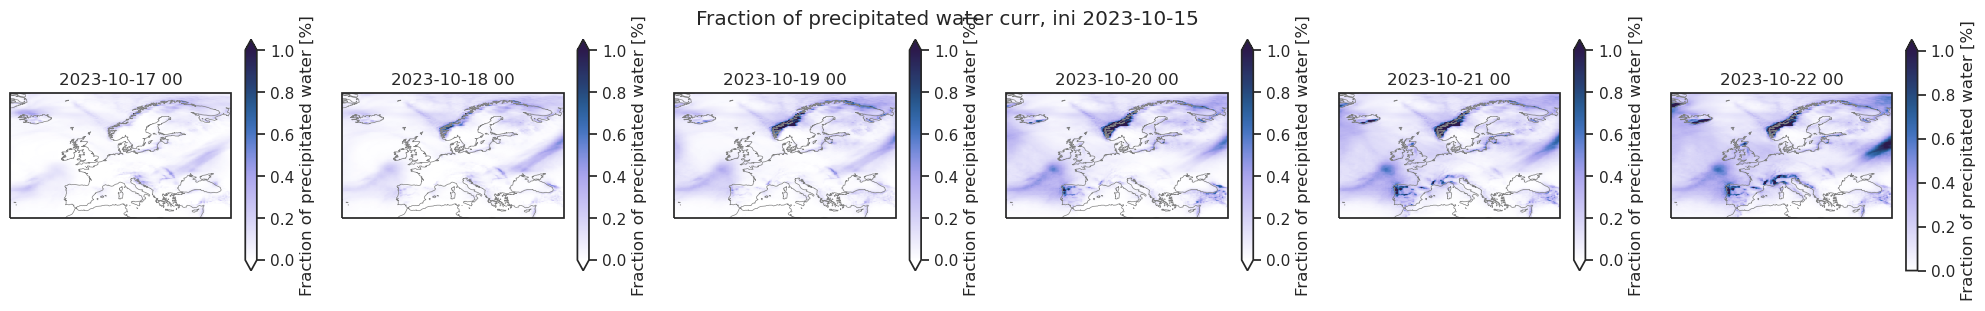

In [33]:
inidate = '2023-10-15'
experiment = 'curr'

latitude = exp_sfc['curr'].latitude.values
longitude = exp_sfc['curr'].longitude.values

fig, ax = plt.subplots(1, 6, figsize=(25, 3), subplot_kw={'projection': ccrs.PlateCarree()})


for i, time in enumerate(times):
    # ax[i].set_extent(uk, crs=ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', linewidth=0.5)

    # Plot scalar advection
    (fpw[experiment].sel(time=time, inidate=inidate).mean('number')).plot(vmin=0, vmax=1, 
                                                                    cmap=cm.devon_r, 
                                                                    ax=ax[i],
                                                                    transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={"label": "Fraction of precipitated water [%]"})

    ax[i].set_title(f'{time}')
plt.suptitle(f'Fraction of precipitated water {experiment}, ini {inidate}')

Text(0.5, 0.98, 'Fraction of precipitated water pi, ini 2023-10-15')

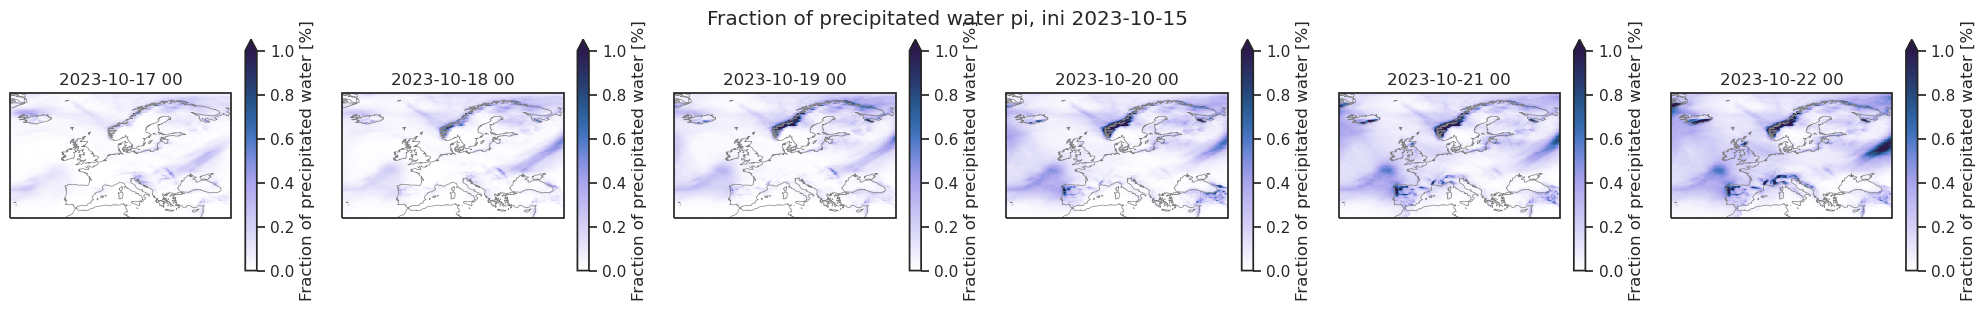

In [32]:
inidate = '2023-10-15'
experiment = 'pi'

latitude = exp_sfc['curr'].latitude.values
longitude = exp_sfc['curr'].longitude.values

fig, ax = plt.subplots(1, 6, figsize=(25, 3), subplot_kw={'projection': ccrs.PlateCarree()})


for i, time in enumerate(times):
    # ax[i].set_extent(uk, crs=ccrs.PlateCarree())
    ax[i].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', linewidth=0.5)

    # Plot scalar advection
    (fpw[experiment].sel(time=time, inidate=inidate).mean('number')).plot(vmin=0, vmax=1, 
                                                                    cmap=cm.devon_r, 
                                                                    ax=ax[i],
                                                                    transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={"label": "Fraction of precipitated water [%]"})

    ax[i].set_title(f'{time}')
plt.suptitle(f'Fraction of precipitated water {experiment}, ini {inidate}')

# Full period

In [27]:
times = ['2023-10-17 00', '2023-10-18 00', '2023-10-19 00', '2023-10-20 00', '2023-10-21 00', '2023-10-22 00']

In [38]:
avg_tcw = {key: exp_sfc[key].tcw.sel(time=slice(times[0], times[-1])).mean(dim=['time']) for key in exp_sfc.keys()}
avg_fpw = {key: (exp_sfc[key].tp/avg_tcw[key]).sel(time=slice(times[0], times[-1])).mean(dim=['time'])*100 for key in exp_sfc.keys()}

Text(0.5, 0.98, 'Fraction of precipitated water between 2023-10-17 00 and 2023-10-22 00, ini 2023-10-15')

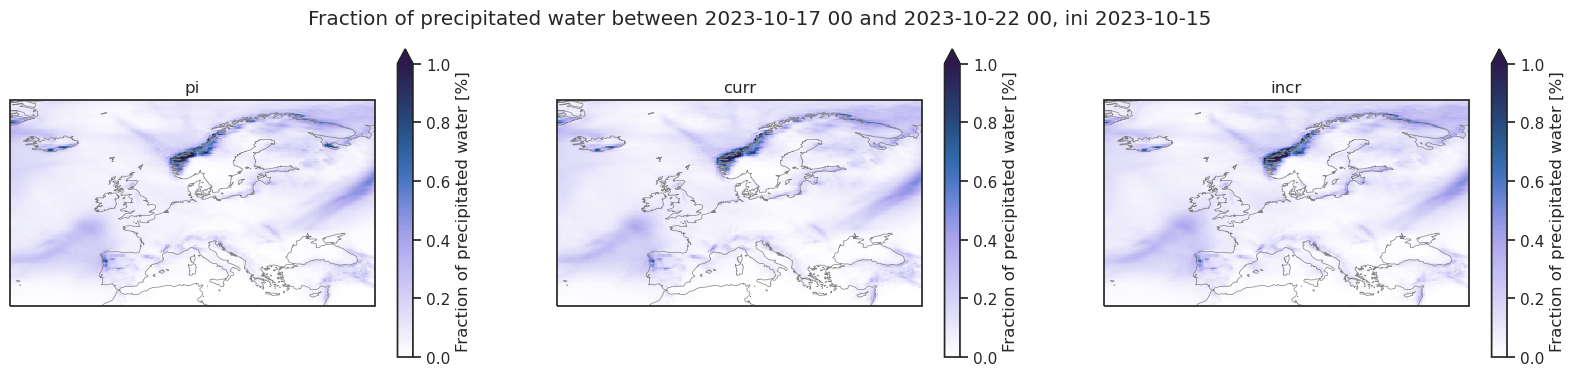

In [46]:
inidate = '2023-10-15'

latitude = exp_sfc['curr'].latitude.values
longitude = exp_sfc['curr'].longitude.values

fig, ax = plt.subplots(1, 3, figsize=(20, 4), subplot_kw={'projection': ccrs.PlateCarree()})


for e, experiment in enumerate(experiments):
    # ax[e].set_extent(uk, crs=ccrs.PlateCarree())
    ax[e].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', linewidth=0.5)

    # Plot scalar advection
    (avg_fpw[experiment].sel(inidate=inidate).mean('number')).plot(vmin=0, vmax=1, 
                                                                    cmap=cm.devon_r, 
                                                                    ax=ax[e],
                                                                    transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={"label": "Fraction of precipitated water [%]"})

    ax[e].set_title(f'{experiment}')
plt.suptitle(f'Fraction of precipitated water between {times[0]} and {times[-1]}, ini {inidate}')

Text(0.5, 0.98, 'Fraction of precipitated water between 2023-10-17 00 and 2023-10-22 00, ini 2023-10-15')

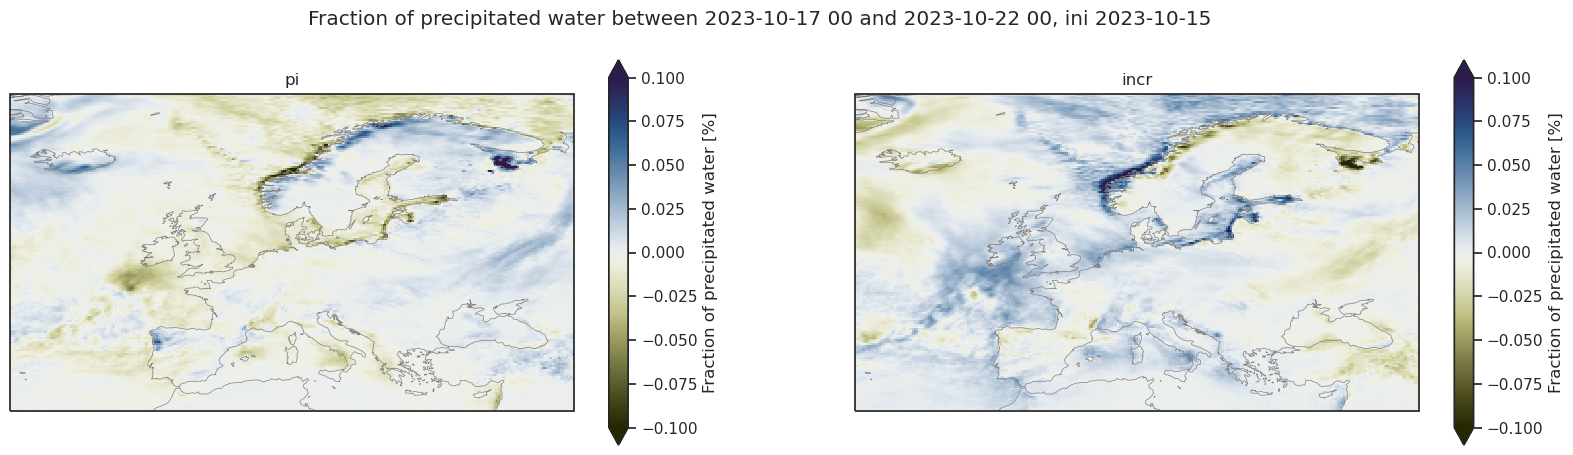

In [45]:
inidate = '2023-10-15'

latitude = exp_sfc['curr'].latitude.values
longitude = exp_sfc['curr'].longitude.values

fig, ax = plt.subplots(1, 2, figsize=(20, 5), subplot_kw={'projection': ccrs.PlateCarree()})


for e, experiment in enumerate(['pi', 'incr']):
    # ax[e].set_extent(uk, crs=ccrs.PlateCarree())
    ax[e].add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='gray', linewidth=0.5)

    # Plot scalar advection
    ((avg_fpw[experiment]-avg_fpw['curr']).sel(inidate=inidate).mean('number')).plot(vmin=-0.1, vmax=0.1, 
                                                                    cmap=cm.broc_r, 
                                                                    ax=ax[e],
                                                                    transform=ccrs.PlateCarree(),
                                                                    cbar_kwargs={"label": "Fraction of precipitated water [%]"})

    ax[e].set_title(f'{experiment}')
plt.suptitle(f'Fraction of precipitated water between {times[0]} and {times[-1]}, ini {inidate}')